## Observations and Insights 

In [153]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_combined = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mouse_study_combined


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [154]:
mouse_study_combined.duplicated().sum()
#mouse_study_combined.loc[mouse_study_combined.duplicated():]



1

In [155]:
mouse_study_combined.shape
len(mouse_study_combined['Mouse ID'].unique())


249

In [156]:
#count number of mice
mouse_count = len(mouse_study_combined['Mouse ID'].unique())
mouse_count_df = pd.DataFrame({"Number of Mice": [mouse_count]})
mouse_count_df


,Number of Mice
0,249


In [157]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_clean = mouse_study_combined.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
mouse_study_clean



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [158]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_id = mouse_study_combined[mouse_study_combined.duplicated(subset = ['Mouse ID', 'Timepoint'])]
duplicate_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [159]:
all_dup_data = mouse_study_combined.loc[mouse_study_combined['Mouse ID'] == 'g989']
all_dup_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [160]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_combined.loc[mouse_study_combined['Mouse ID']!= 'g989']
clean_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [161]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count = len(clean_df['Mouse ID'].unique())
new_mouse_df = pd.DataFrame({"Number of Mice": [new_mouse_count]})
new_mouse_df


,Number of Mice
0,248


## Summary Statistics

In [162]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#regimen_groupby = clean_df.groupby(['Drug Regimen'])
clean_df
Tumor_Vol_Mean = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
Tumor_Vol_Median = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
Tumor_Vol_var = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
Tumor_Vol_stdev = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
Tumor_Vol_sem = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_stats = pd.DataFrame({'Mean of Tumor Volume': Tumor_Vol_Mean, 
                              'Median of Tumor Volume': Tumor_Vol_Median, 
                              'Variance of Tumor Volume': Tumor_Vol_var, 
                        'Standard Deviation of Tumor Volume': Tumor_Vol_stdev, 
                              'SEM of Tumor Volume': Tumor_Vol_sem})

summary_stats


,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [163]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
summary_statistics
# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

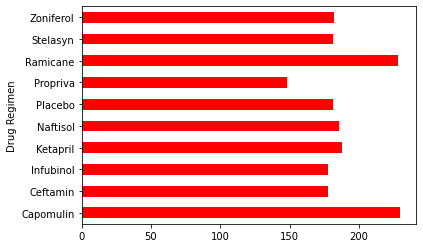

In [164]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
total_mice_regimen = clean_df.groupby('Drug Regimen').count()['Mouse ID']
total_mice_regimen
type(total_mice_regimen)

total_mice_regimen.plot(kind='barh', color='r')
plt.ylabel('Drug Regimen')
plt.show()



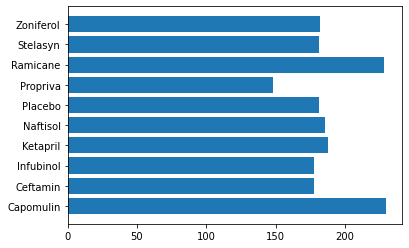

In [165]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.barh(total_mice_regimen.index, total_mice_regimen)
plt.show()


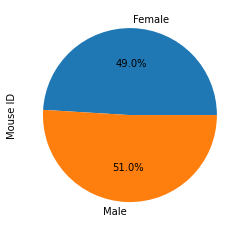

In [166]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
dist_gender = clean_df.groupby('Sex').count()['Mouse ID']
dist_gender

dist_gender.plot(kind='pie', autopct='%1.1f%%');


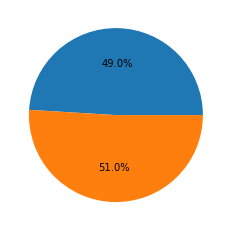

In [167]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(dist_gender, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [168]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#creating a dataframe having all drugs from regimen list 
drug_regimen = clean_df.loc[clean_df['Drug Regimen'].isin(regimen)]


# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drug_regimen.groupby('Mouse ID').max()['Timepoint']
last_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_merge = pd.merge(last_timepoint, drug_regimen, on=['Mouse ID', 'Timepoint'])
last_timepoint_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [169]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []
for drug in regimen: 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_values_df = last_timepoint_merge.loc[last_timepoint_merge['Drug Regimen']==drug, 'Tumor Volume (mm3)']
    tumor_volume.append(tumor_values_df)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_values_df.quantile([.25,.50,.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    interquartile_range = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5*interquartile_range)
    upper_bound = upper_quartile + (1.5*interquartile_range)
        
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
    outliers = tumor_values_df.loc[(tumor_values_df<lower_bound)|(tumor_values_df>upper_bound)]
    
    print(outliers)

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


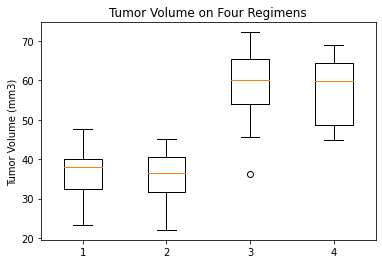

In [170]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume on Four Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_volume)
plt.show()


## Line and Scatter Plots

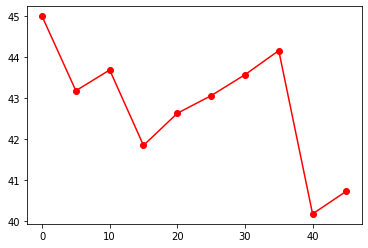

In [171]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = drug_regimen.loc[drug_regimen["Drug Regimen"]=='Capomulin']
capomulin_mouse = capomulin_df.loc[capomulin_df['Mouse ID']=='s710']
capomulin = plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'], marker='o', color='r', linewidth = 1.5, label="Time Point vs Tumor Value in s710")
plt.show()


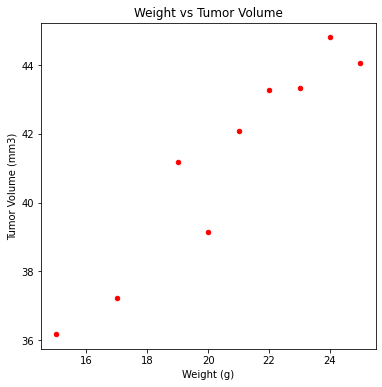

In [172]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_sorted = capomulin_df.sort_values('Weight (g)').set_index('Weight (g)')
capomulin_sorted_groupby = capomulin_sorted.groupby('Weight (g)').mean()['Tumor Volume (mm3)']
scatter_data = pd.DataFrame(capomulin_sorted_groupby).reset_index()


scatter_plot = scatter_data.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', title='Weight vs Tumor Volume', marker='o', color='r', figsize= (6,6))
plt.show()




## Correlation and Regression

In [173]:
scatter_data


,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


The correlation coefficient is: 0.9034966277438606


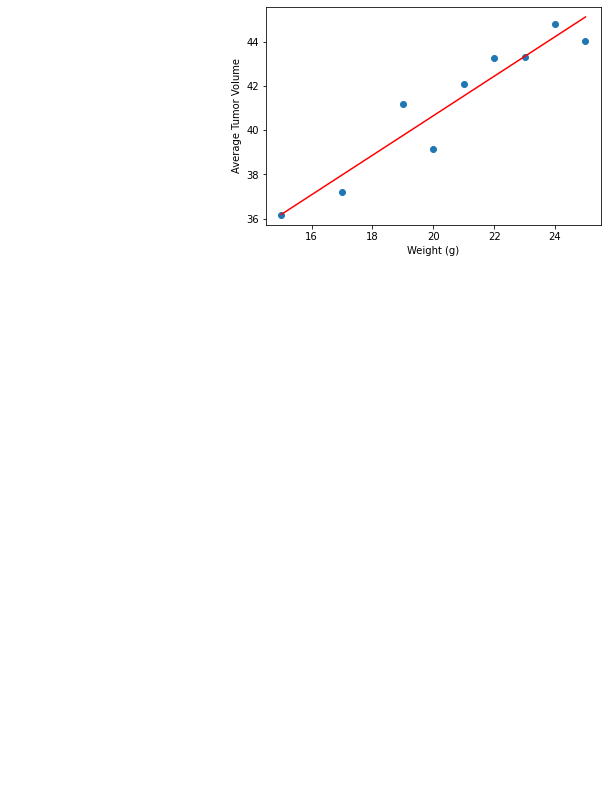

In [179]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
scatter_data.columns = ['weight', 'tumor_avg']
weight = scatter_data.weight
tumor_avg = scatter_data.tumor_avg
correlation = st.pearsonr(weight, tumor_avg)

#linear regression model
x_values = weight
y_values = tumor_avg
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(6,10), fontsize=15, color='r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
print(f"The correlation coefficient is: {rvalue**2}")
plt.show()

